# LendingClub - Deep Learning 

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), I have built a model that can predict wether or nor a borrower will pay back their loan. This way in the future when company get a new potential customer they can assess whether or not they are likely to pay back the loan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_info = pd.read_csv('lending_club_info.csv', index_col = 'LoanStatNew')

In [4]:
print(df_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [6]:
def feat_info(col_name):
    print(df_info.loc[col_name]['Description'])

In [7]:
feat_info('mort_acc')

Number of mortgage accounts.


In [8]:
df = pd.read_csv('lending_club_loan_two.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [11]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


## EDA

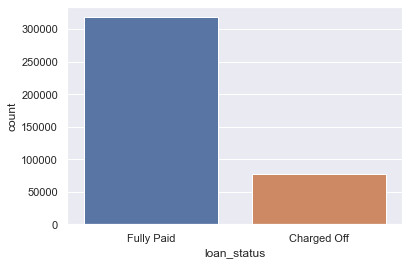

In [13]:
sns.countplot(x='loan_status', data = df) # to explore the balance of labels

(0.0, 45000.0)

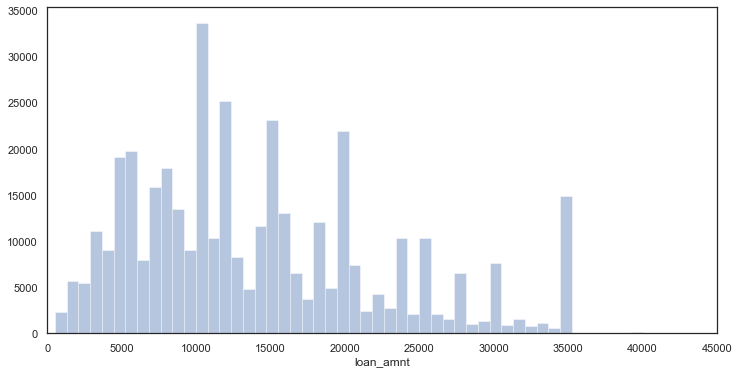

In [23]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.distplot(df['loan_amnt'], bins = 50, hist = True, kde = False)
plt.xlim(0,45000)

Spikes are happening at even money amounts (10000, 15000, 20000, 35000)

In [24]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


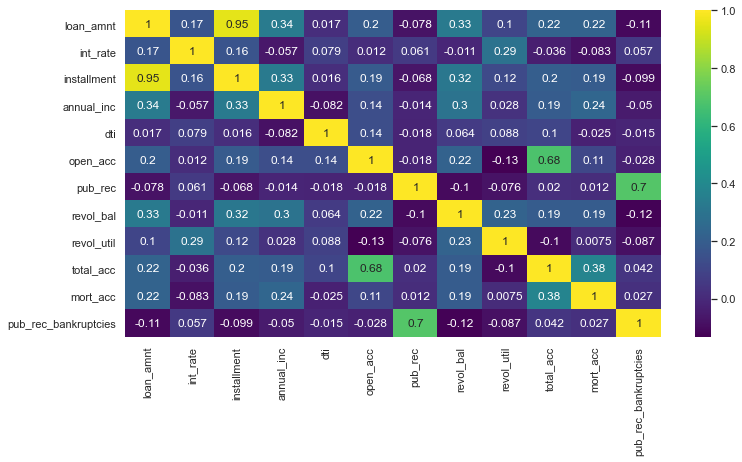

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap = 'viridis')

We can notice a strong correlation between loan_amnt and installment 0.95. Can be assumed that they are correlated due to some sort of formula that company uses. 

In [27]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


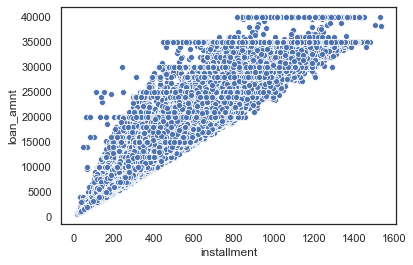

In [28]:
sns.scatterplot(x='installment', y = 'loan_amnt', data = df) # to confirm assumption made before

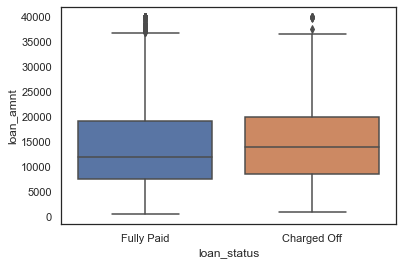

In [29]:
sns.boxplot(x='loan_status', y='loan_amnt', data = df)

If our loan_amnt is higher then we have a slight increase in the likelihood of it being charged off. It's harder to pid back larger loans . 

In [30]:
df.groupby('loan_status').describe() # to confirm the assumption by looking at the mean. 

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               int_rate             ... mort_acc        \
                 75%      max     count       mean  ...      75%   max   
loan_status                                         ...                  
Charged Off  20000.0  40000.0   77673.0  15.882587  ...      2.0  23.0   
Fully Paid   19225.0  40000.0  318357.0  13.092105  ...      3.0  34.0   

            pub_rec_bankruptcies                                               
                           count      mean       std  min  25%  50%  75%  max  
loan_status                                                                    
Charged Off              77586.0  0.128412  0.368853  0.0  0.0  0.0  0.0  8.0  
Fully Paid              317909.0  0.119997  0.352992  0.0  0.0  0.0  0.0  8.0  

[2 rows x 96 columns]

In [34]:
list(df['grade'].unique())

['B', 'A', 'C', 'E', 'D', 'F', 'G']

In [35]:
list(df['sub_grade'].unique())

['B4',
 'B5',
 'B3',
 'A2',
 'C5',
 'C3',
 'A1',
 'B2',
 'C1',
 'A5',
 'E4',
 'A4',
 'A3',
 'D1',
 'C2',
 'B1',
 'D3',
 'D5',
 'D2',
 'E1',
 'E2',
 'E5',
 'F4',
 'E3',
 'D4',
 'G1',
 'F5',
 'G2',
 'C4',
 'F1',
 'F3',
 'G5',
 'G4',
 'F2',
 'G3']

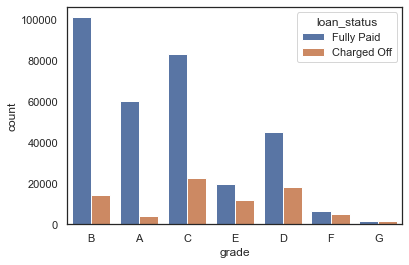

In [37]:
sns.countplot(x='grade', data =df, hue='loan_status')

Countplot shows percentage of charged off loans increasing as the letter grade gets higher. Looks like the best customers are given a grade of A , second B, third C etc. 

In [38]:
feat_info('grade')

LC assigned loan grade


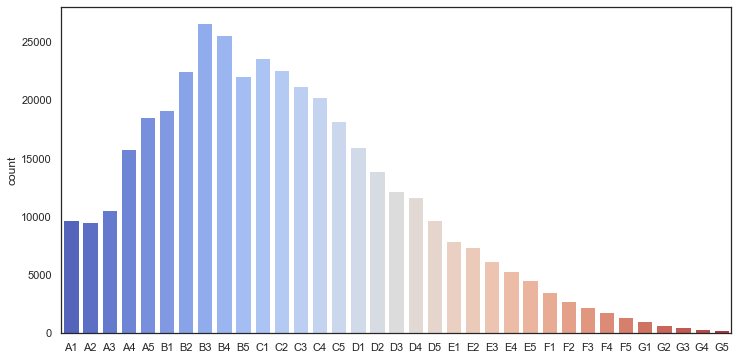

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(x=sorted(df['sub_grade']), data = df,palette = 'coolwarm')

Looks like a majority of customers are in A, B, C sub_group. 

In [42]:
feat_info('sub_grade')

LC assigned loan subgrade


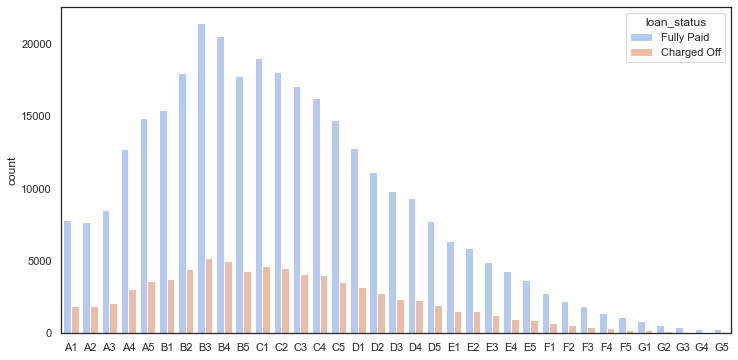

In [56]:
plt.figure(figsize=(12,6))
sns.countplot(x=sorted(df['sub_grade']), data = df, hue = 'loan_status',palette = 'coolwarm')

In worse grade categories looks like the charged off rate is almost the same as the fully paid rate. 

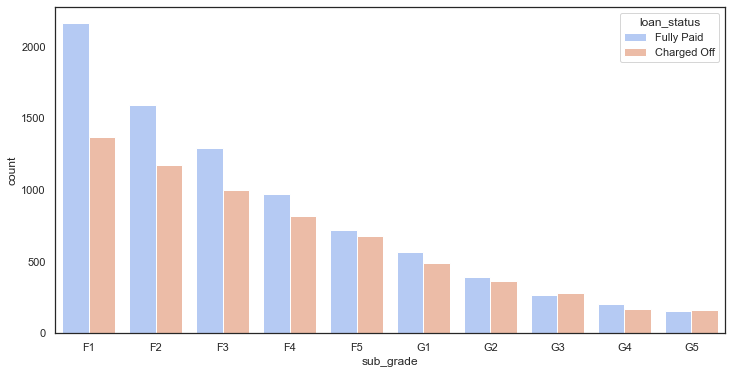

In [62]:
f_and_g = df[(df['grade'] == 'F')| (df['grade'] == 'G' )]
plt.figure(figsize=(12,6))
sub_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data = f_and_g, hue = 'loan_status',order = sub_order,palette = 'coolwarm')

If somebody is graded G% the likelihood is almost the same as fully paying off the loan versus being charged off on the loan.

In [64]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [65]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off':0}) # Create a new column with values 1 (Paid off) and 0(Charged Off)

In [66]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


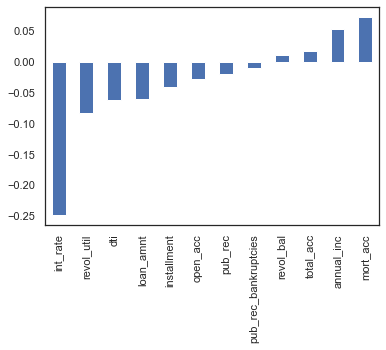

In [67]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar') # Correlation between a new column and numerical data

Intrest rate has the highest negative correlation with whether or not someone's going to repay their loan.

## Data Preprocessing

In [68]:
df.isnull().sum() # Cheking a missing values

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [75]:
len(df)

396030

In [76]:
df.isnull().sum()/len(df)*100 # Percentage of a missing values

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [78]:
print(feat_info('emp_title'))
print('\n')
print(feat_info('emp_length'))

The job title supplied by the Borrower when applying for the loan.*
None


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
None


In [79]:
df['emp_title'].nunique()

173105

In [82]:
df['emp_title'].value_counts(ascending=False)

Teacher                           4389
Manager                           4250
Registered Nurse                  1856
RN                                1846
Supervisor                        1830
                                  ... 
Farmers Feed & Grain                 1
A&A Electronics Assembly, INC.       1
window world                         1
APPLIED MEDICAL                      1
Imhoff & Associates PC               1
Name: emp_title, Length: 173105, dtype: int64

In [83]:
df = df.drop('emp_title', axis = 1) # too many unique values to transform them into dummy hence the column will be dropped

In [87]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [91]:
emp_length_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]

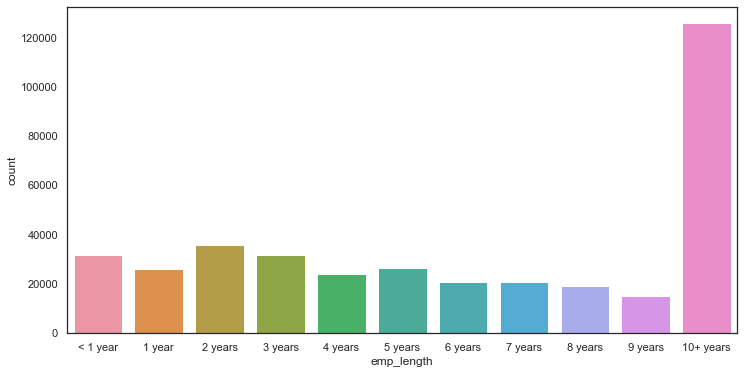

In [92]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length', data = df, order = emp_length_order)

Majoriy of people have been working in their employment for 10+ years. 

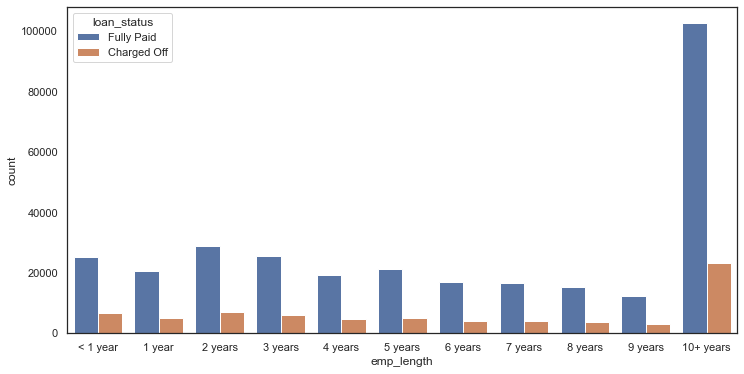

In [93]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length', data = df, order = emp_length_order, hue = 'loan_status')

In [102]:
# checking the percentage of charge offs per employment lenght category
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_co

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [104]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
emp_fp

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [105]:
emp_len = emp_co/emp_fp

In [106]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

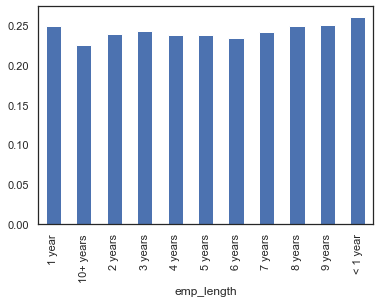

In [107]:
emp_len.plot(kind='bar')

In [108]:
df = df.drop('emp_length', axis =1) # drop the column emp_length due to not enough differentiation between the emp_length 

In [109]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [110]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [112]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [113]:
df =df.drop('title', axis = 1) #dropping 'title' as title is a subcategory description of the purpose.

In [114]:
df['mort_acc']

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

In [115]:
feat_info('mort_acc')

Number of mortgage accounts.


In [116]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [117]:
df.corr()['mort_acc'] #which columns most highly correlate with mort_acc column

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

In [118]:
df.groupby('total_acc')['mort_acc'].mean() #average mort_acc per total_acc

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [119]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [120]:
total_acc_avg[2.0]

0.0

In [121]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [122]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [123]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [124]:
df=df.dropna()

In [125]:
df.isnull().sum() # dropping the rest of the rows with a missing values.

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

In [129]:
df.select_dtypes(include='object').columns #checking category data

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [131]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [132]:
df['term'] = df['term'].apply(lambda term: int(term[:3])) #changing term column to either 36 or 60 int

In [133]:
df = df.drop('grade', axis = 1) #dropping 'grade' due to 'sub_grade' are going to be included into a model

In [134]:
dummies = pd.get_dummies(df['sub_grade'], drop_first =True) # transforming 'sub_grade' into dummies

In [135]:
df = pd.concat([df.drop('sub_grade',axis=1),dummies], axis = 1) # concatenating two dfs and droping 'sub_grade' from original

In [138]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [139]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [140]:
#'verification_status', 'application_type','initial_list_status','purpose' transforming these columns into dummy variables

In [141]:
ver_dummies = pd.get_dummies(df['verification_status'], drop_first =True)
app_dummies = pd.get_dummies(df['application_type'], drop_first =True)
inital_dummies = pd.get_dummies(df['initial_list_status'], drop_first =True)
pur_dummies = pd.get_dummies(df['purpose'], drop_first =True)

In [142]:
df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),ver_dummies,app_dummies,inital_dummies,pur_dummies], axis = 1)

In [144]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified',
       'Verified', 'INDIVIDUAL', 'JOINT', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

In [145]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [146]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER') # convert ANY and NONE to OTHER

In [147]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [148]:
home_dummy = pd.get_dummies(df['home_ownership'], drop_first =True)
df = pd.concat([df.drop('home_ownership',axis =1),home_dummy], axis = 1) #transform 'home_ownership' into dummies

In [149]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,medical,moving,other,renewable_energy,small_business,vacation,wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
df['address'][0]

'0174 Michelle Gateway\nMendozaberg, OK 22690'

In [153]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:]) #extracting zip_code from 'address'

In [157]:
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 395219, dtype: object

In [158]:
zip_dummies = pd.get_dummies(df['zip_code'],drop_first = True)
df = df.drop(['zip_code', 'address'], axis = 1)
df = pd.concat([df,zip_dummies], axis = 1)

In [160]:
df = df.drop('issue_d', axis = 1) # in reality we won't have an issue date when running a model

In [161]:
df.select_dtypes(include='object').columns

Index(['loan_status', 'earliest_cr_line'], dtype='object')

In [162]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [163]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line']) #converting to timestamp

In [169]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date: date.year) #extracting year

In [171]:
df = df.drop('earliest_cr_line', axis = 1)

In [172]:
df.select_dtypes(include='object').columns

Index(['loan_status'], dtype='object')

## Train Test Split

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
df = df.drop('loan_status', axis = 1) # duplicate of loan_repaid column

In [176]:
X = df.drop('loan_repaid',axis = 1).values
y = df['loan_repaid'].values

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the data

In [179]:
from sklearn.preprocessing import MinMaxScaler

In [180]:
scaler = MinMaxScaler()

In [181]:
X_train = scaler.fit_transform(X_train)

In [182]:
X_test = scaler.transform(X_test)

## Creating the Model

In [183]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [184]:
model = Sequential()

model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam')

In [185]:
model.fit(x=X_train,
         y = y_train,
         epochs = 25,
         batch_size = 256,
         validation_data = (X_test,y_test))

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 10s 32us/sample - loss: 0.2989 - val_loss: 0.2647
Epoch 2/25
316175/316175 [==============================] - 6s 18us/sample - loss: 0.2654 - val_loss: 0.2633
Epoch 3/25
316175/316175 [==============================] - 6s 18us/sample - loss: 0.2631 - val_loss: 0.2624
Epoch 4/25
316175/316175 [==============================] - 6s 18us/sample - loss: 0.2618 - val_loss: 0.2628
Epoch 5/25
316175/316175 [==============================] - 6s 18us/sample - loss: 0.2610 - val_loss: 0.2618
Epoch 6/25
316175/316175 [==============================] - 6s 18us/sample - loss: 0.2606 - val_loss: 0.2619
Epoch 7/25
316175/316175 [==============================] - 6s 18us/sample - loss: 0.2601 - val_loss: 0.2620
Epoch 8/25
316175/316175 [==============================] - 6s 18us/sample - loss: 0.2594 - val_loss: 0.2613
Epoch 9/25
316175/316175 [==============================] - 6s 18us/sample -

In [186]:
from tensorflow.keras.models import load_model

In [187]:
model.save('full_data_project_model.h5') 

## Evaluating Model Preformance 

In [188]:
losses = pd.DataFrame(model.history.history)

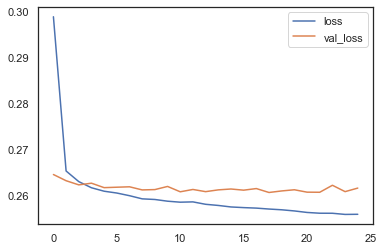

In [189]:
losses.plot()

In [191]:
predictions = model.predict_classes(X_test)

In [190]:
from sklearn.metrics import classification_report, confusion_matrix

In [192]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 6896  8762]
 [  128 63258]]


              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



Accuracy for a model is around 90%, Recall is small for 0s due to inbalanced labels (Fully Paid, Charged Off) - 80% of customers where paying back the loan. F1 score for 0s is 0.61 which is not that bad. However entire model is better than 80% random/straight guess. 

#### Checking the prediction for random customer

In [196]:
import random
random.seed(102)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           14400.00
term                   36.00
int_rate               11.14
installment           472.40
annual_inc          60000.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     2005.00
Name: 77826, Length: 78, dtype: float64

In [197]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [198]:
new_customer

array([[0.34358974, 0.        , 0.2267238 , 0.29890881, 0.00689134,
        0.00177918, 0.2       , 0.        , 0.01025145, 0.03922448,
        0.10738255, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.  

In [200]:
model.predict_classes(new_customer)

array([[1]])

##### Checking if this person actually end up paying back their loan

In [201]:
df.iloc[random_ind]['loan_repaid']

1.0